### 🚦 Exploring Data Quality Issues in NYC Collision Factors

This notebook demonstrates three common data quality issues:
- 📈 **Outliers:** Extreme or unlikely values that differ greatly from other data.
- ⚖️ **Imbalanced Data:** One class or value occurs far more frequently than others.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load the Data
dataset_url = "https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv"
collisions = pd.read_csv(dataset_url)
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


## 📈 Outliers

Visualize and inspect outliers in numerical columns.

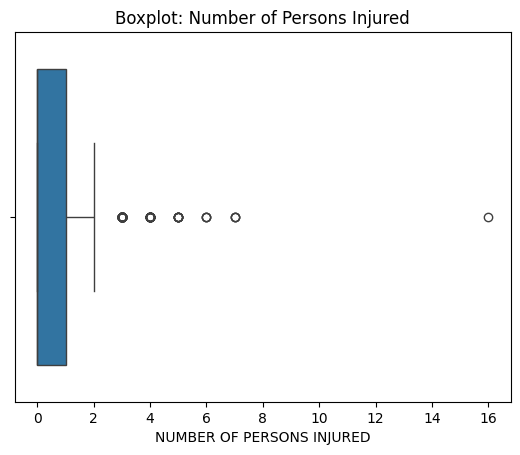

Rows with most persons injured:
      NUMBER OF PERSONS INJURED  ZIP CODE  CONTRIBUTING FACTOR VEHICLE 1
2626                         16   11435.0  Failure to Yield Right-of-Way
4797                          7       NaN  Failure to Yield Right-of-Way
696                           7   10454.0  Failure to Yield Right-of-Way
6940                          7   11208.0  Failure to Yield Right-of-Way
3046                          6   11434.0  Failure to Yield Right-of-Way


In [3]:
# Use a boxplot to see outliers in 'NUMBER OF PERSONS INJURED'
sns.boxplot(x=collisions["NUMBER OF PERSONS INJURED"])
plt.title("Boxplot: Number of Persons Injured")
plt.show()

# Show the top 5 rows with the most injuries
print("Rows with most persons injured:")
print(collisions.sort_values("NUMBER OF PERSONS INJURED", ascending=False)[[
    "NUMBER OF PERSONS INJURED", "ZIP CODE", "CONTRIBUTING FACTOR VEHICLE 1"
]].head())

## ⚖️ Imbalanced Data

Show imbalance in fatal vs non-fatal collision counts.

Value counts for 'NUMBER OF PERSONS KILLED':
NUMBER OF PERSONS KILLED
0    7296
1       7
Name: count, dtype: int64


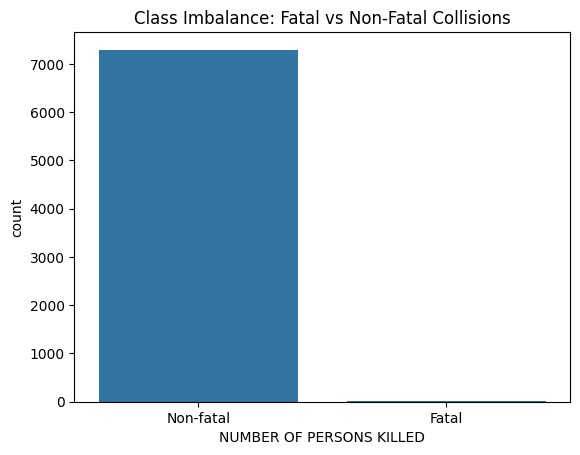

In [4]:
# Value counts for fatalities (rare class)
print("Value counts for 'NUMBER OF PERSONS KILLED':")
print(collisions["NUMBER OF PERSONS KILLED"].value_counts())

# Visualize imbalance
fatality_type = collisions["NUMBER OF PERSONS KILLED"].apply(lambda x: 'Fatal' if x > 0 else 'Non-fatal')
sns.countplot(x=fatality_type)
plt.title("Class Imbalance: Fatal vs Non-Fatal Collisions")
plt.show()

#### ✨ Handling data imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an advanced technique used to balance imbalanced datasets by **creating new, synthetic samples** for the minority class instead of simply duplicating existing ones.

- 🧬 **How?**  
  SMOTE generates new data points by interpolating between real samples of the minority class.

- ⚖️ **Why?**  
  This helps machine learning models learn from rare cases, improving performance on minority/rare events.

- 🚀 **When to use?**  
  When you have far fewer examples of the outcome you care about (like fraud, rare diseases, or—here—fatal collisions).

**Learn more:**  
[SMOTE in imbalanced-learn documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)


In [6]:
# !pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import SMOTE

# Create binary target: 1 for fatal, 0 for non-fatal
collisions["fatal"] = (collisions["NUMBER OF PERSONS KILLED"] > 0).astype(int)

# Use correct feature names
X = collisions[[
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF CYCLISTS INJURED"  # <-- fixed here
]].fillna(0)
y = collisions["fatal"]

print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())


Original class distribution:
fatal
0    7296
1       7
Name: count, dtype: int64

After SMOTE class distribution:
fatal
0    7296
1    7296
Name: count, dtype: int64
